In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re
import seaborn as sns
from tqdm.notebook import tqdm
from collections import Counter
from functools import reduce

import sys
sys.path.append("..")
from data_preparation.data_preparation_pos import read_conll
import utils.utils as utils
import utils.pos_utils as pos_utils

In [20]:
p1 = [25, 16, 13, 9, 6]
p2 = [24, 17, 10, 9, 7]
p3 = [26, 16, 0, 8, 12]

df_plot = pd.DataFrame({"Tag": ["NOUN", "ADP", "MULTI", "ADJ", "PUNCT", "OTHERS"],
              "Train": p1 + [100 - sum(p1)],
              "Dev": p2 + [100 - sum(p2)],
              "Test": p3 + [100 - sum(p3)]})

In [21]:
sns.set()
sns.set_style("ticks")

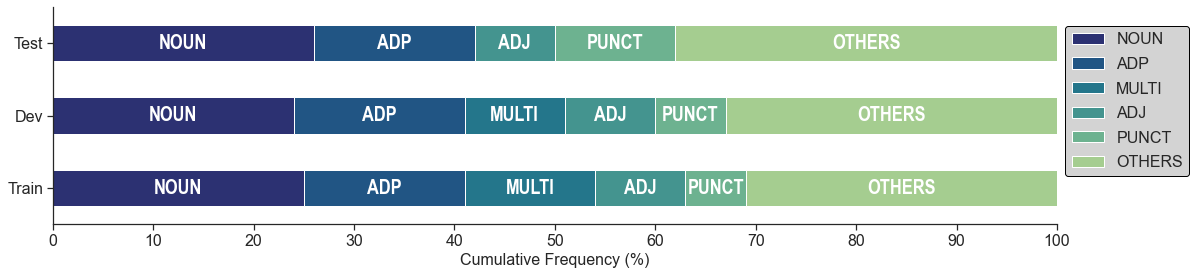

In [25]:
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="white", fontsize=20, fontstretch="condensed",
                   horizontalalignment="center", verticalalignment="center", fontweight="bold")
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)

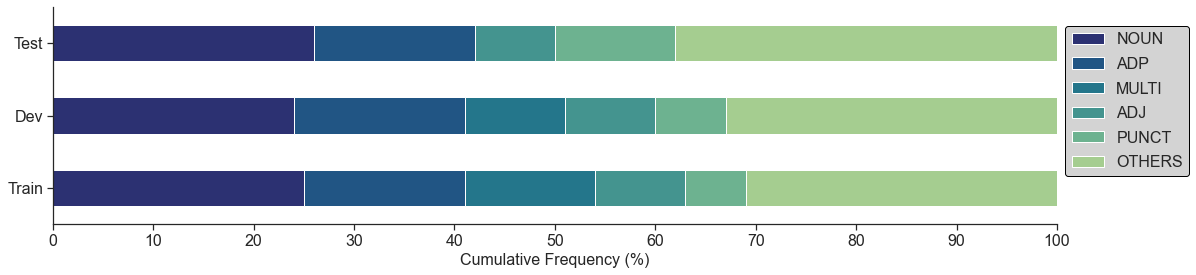

In [43]:
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)

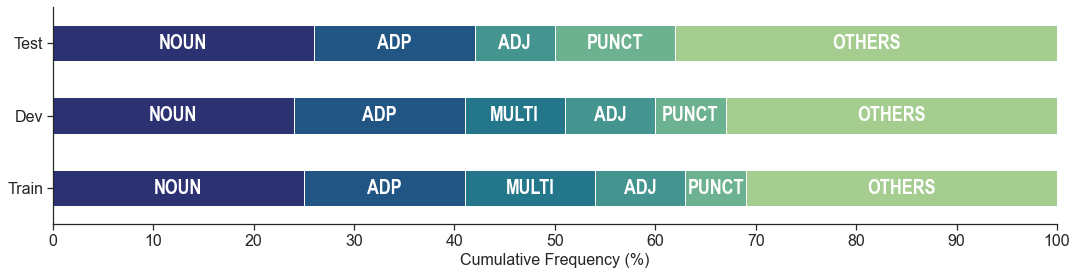

In [44]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="white", fontsize=20, fontstretch="condensed", 
                   fontweight="bold", horizontalalignment="center", verticalalignment="center")
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

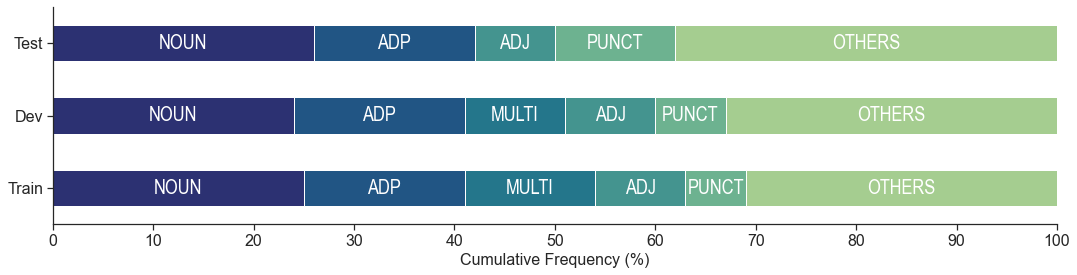

In [45]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="white", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center")
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

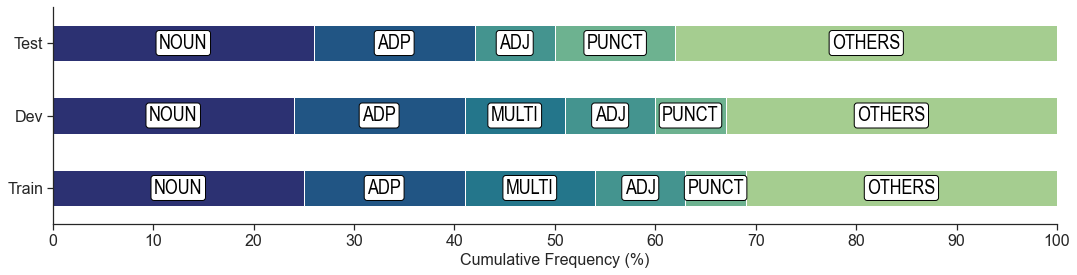

In [46]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", bbox=dict(boxstyle="round, pad=0.15",
                                                                                       fc="white", ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

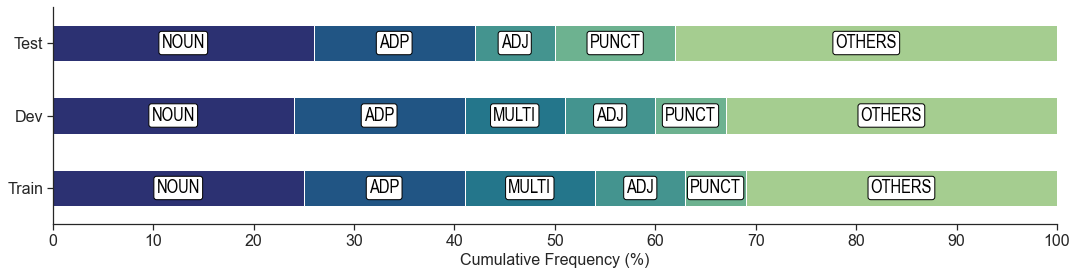

In [47]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=18, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", bbox=dict(boxstyle="round, pad=0.15",
                                                                                       fc="white", ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

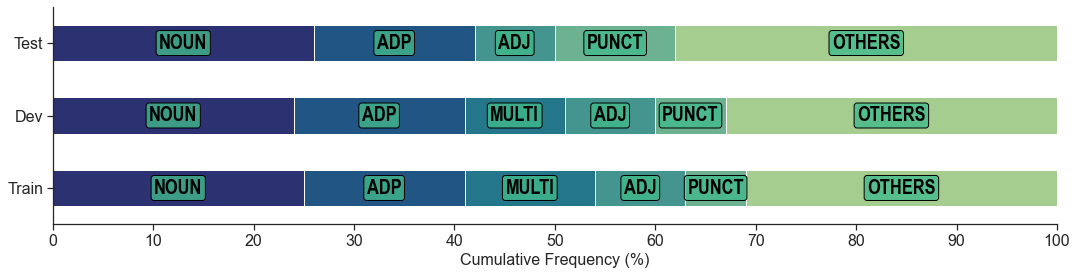

In [48]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=20, fontstretch="condensed",
                   horizontalalignment="center", verticalalignment="center", fontweight="bold",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=np.array([65, 186, 139, 200])/255,
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

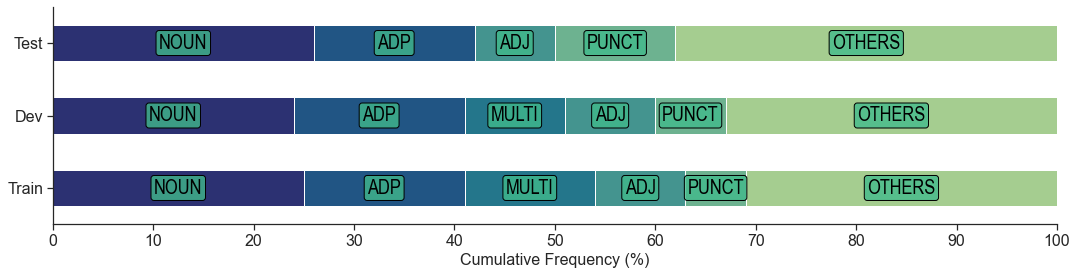

In [49]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=20, fontstretch="condensed",
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=np.array([65, 186, 139, 200])/255,
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

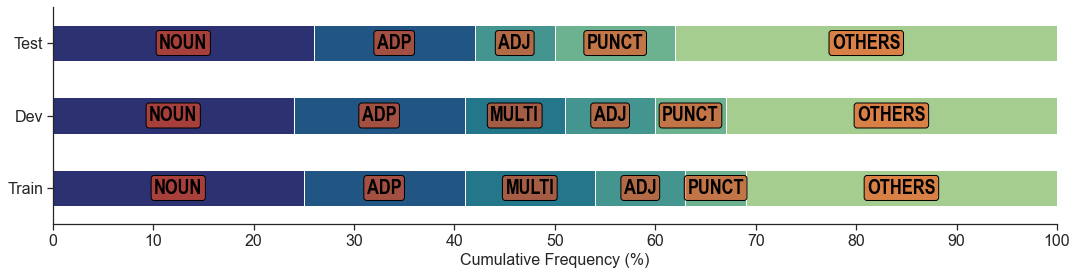

In [50]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=np.array([255, 75, 20, 150])/255,
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

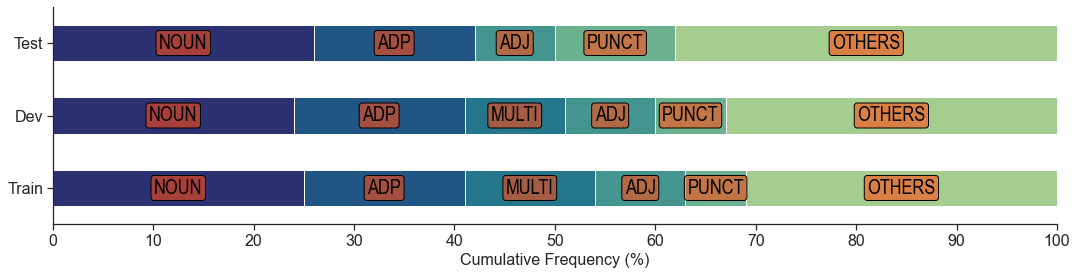

In [51]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=np.array([255, 75, 20, 150])/255,
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

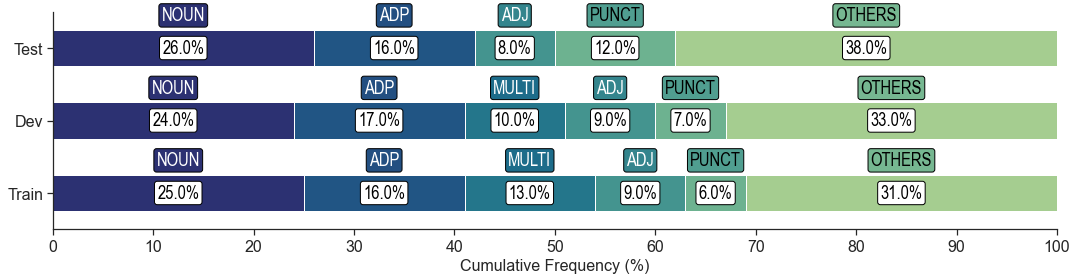

In [52]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
colors = ["#2c3172", "#234f81", "#1d6c8a", "#34858d", "#509e90", "#76b791", "#a5cd90"]
font_colors = ["white"] * 4 + ["black"] * 3
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y+0.45, s=row["Tag"], color=font_colors[i], fontsize=18, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=colors[i],
                             ec="black"))
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=18, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

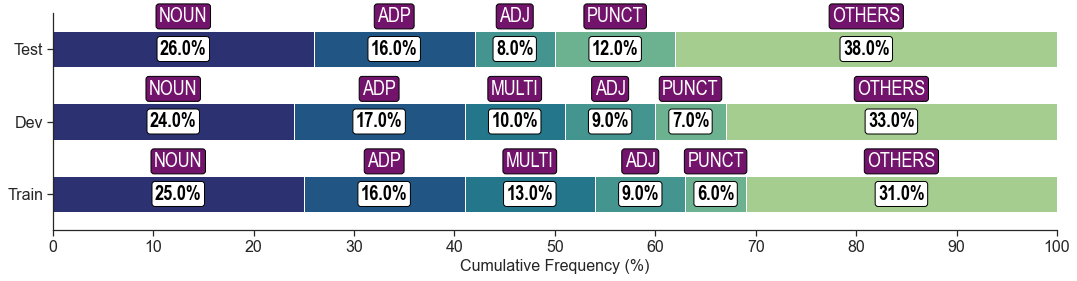

In [53]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y+0.45, s=row["Tag"], color="white", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="#73146c",
                             ec="black"))
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

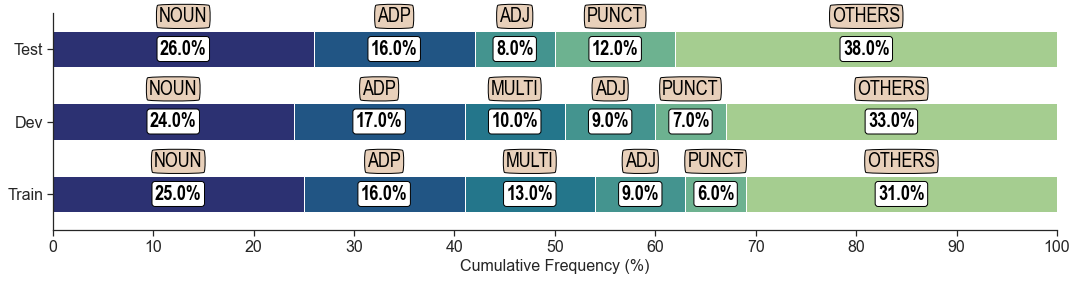

In [54]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y+0.45, s=row["Tag"], color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round4, pad=0.15",
                             fc="#e8d0ba",
                             ec="black"))
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

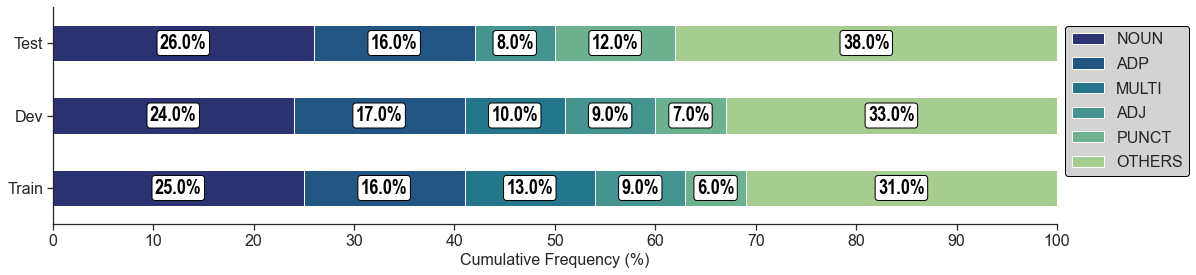

In [55]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)

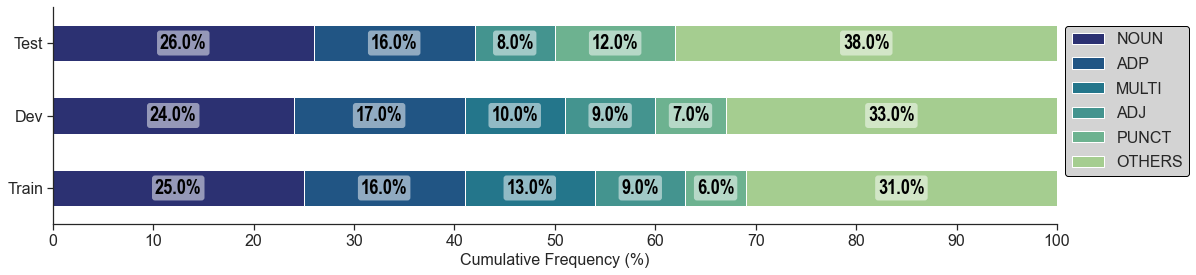

In [56]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=(1, 1, 1, 0.5),
                             ec="none"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)

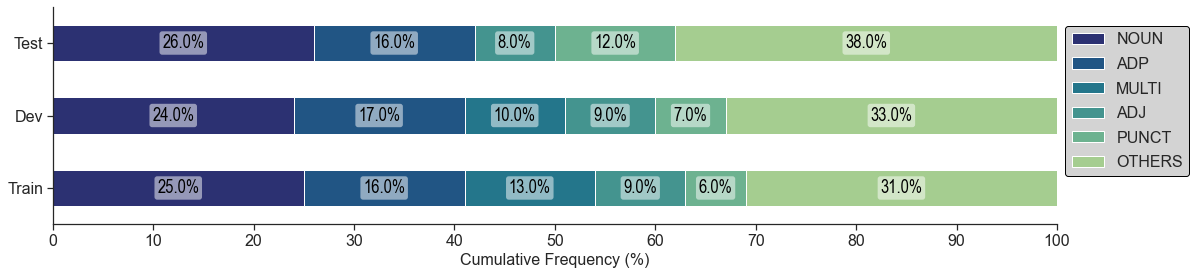

In [57]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=18, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=(1, 1, 1, 0.5),
                             ec="none"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)

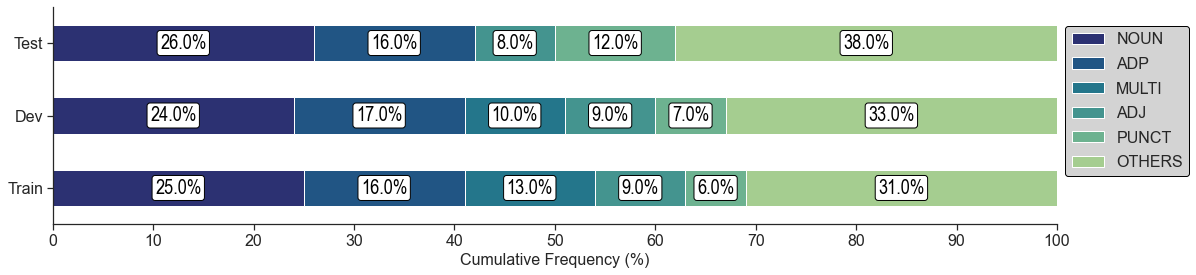

In [58]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)

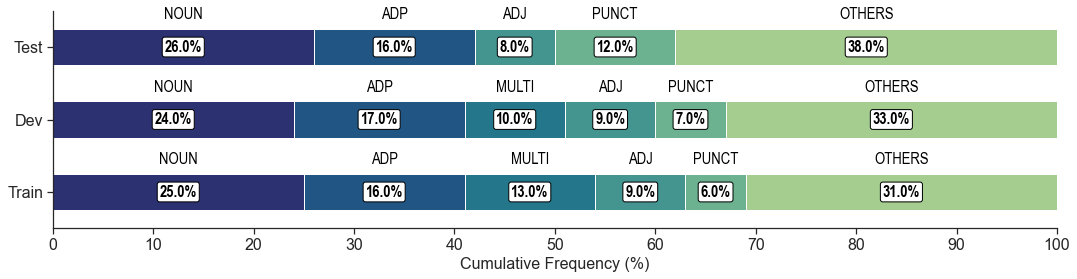

In [59]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y+0.45, s=row["Tag"], color="black", fontsize=16, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal")
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=16, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

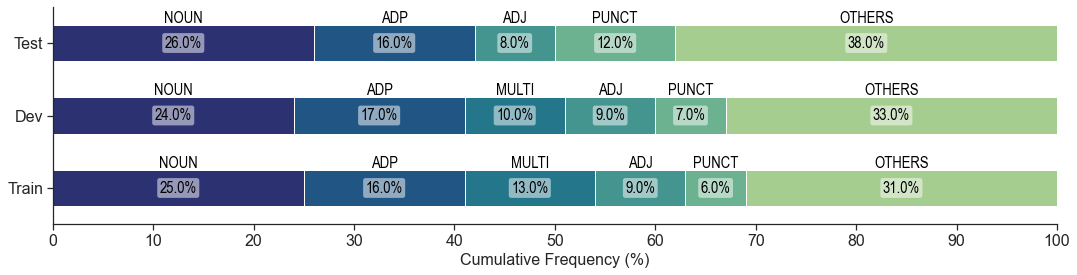

In [69]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y+0.35, s=row["Tag"], color="black", fontsize=16, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal")
            g.text(x=x, y=y, s="{:.1f}%".format(current[y]), color="black", fontsize=16, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=(1, 1, 1, 0.5),
                             ec="none"))
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

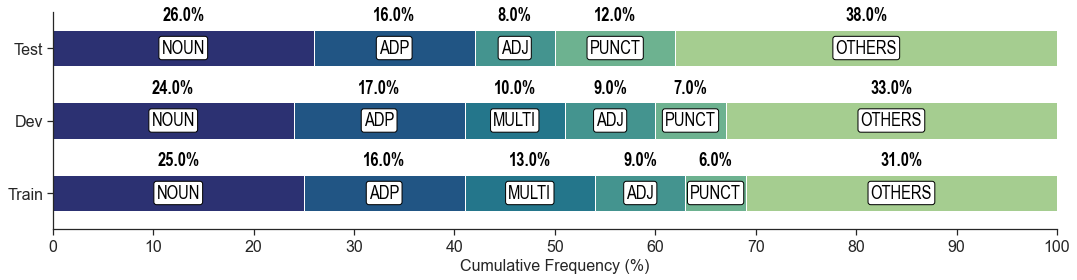

In [61]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=18, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
            g.text(x=x, y=y+0.45, s="{:.1f}%".format(current[y]), color="black", fontsize=18, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold")
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

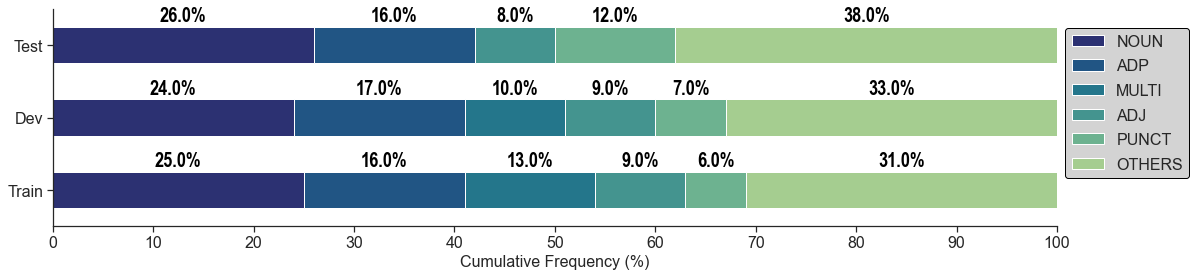

In [62]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, colormap="crest_r", figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y+0.4, s="{:.1f}%".format(current[y]), color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold")
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)

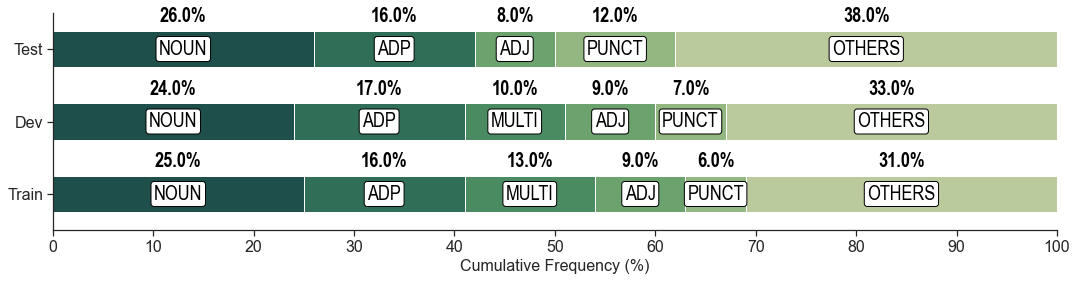

In [63]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="barh", stacked=True, 
                                    colormap=sns.cubehelix_palette(start=2.75, rot=-0.5, as_cmap=True, reverse=True,
                                                                   dark=0.25, light=.75), 
                                    figsize=(18,4), xlim=(0, 100))
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=x, y=y, s=row["Tag"], color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc="white",
                             ec="black"))
            g.text(x=x, y=y+0.45, s="{:.1f}%".format(current[y]), color="black", fontsize=20, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="bold")
g.set_xticks(range(0, 101, 10))
g.set(xlabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(0.95, 0.95), fontsize=16).remove()
sns.despine(ax=g)

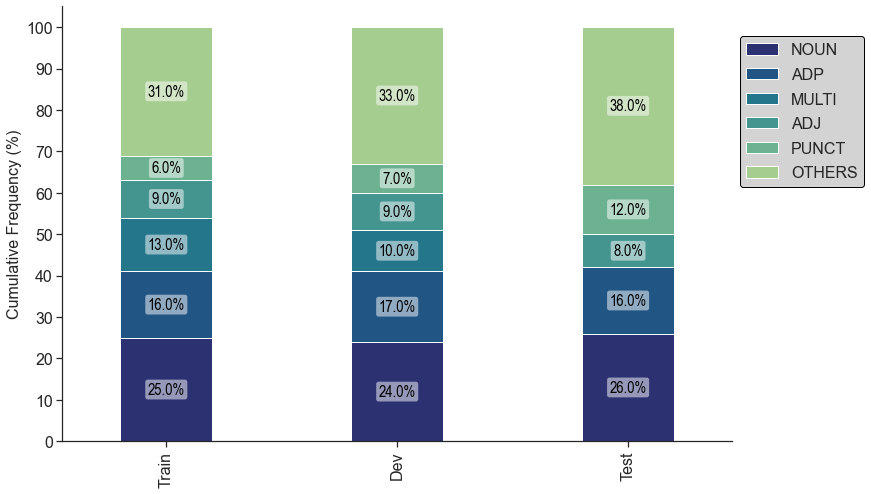

In [79]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc("axes", labelsize=16)
g = df_plot.set_index("Tag").T.plot(kind="bar", stacked=True, colormap="crest_r", figsize=(12,8), width=0.4)
for i, row in df_plot.iterrows():
    cumulative = df_plot.iloc[:i, 1:].sum().values
    current = df_plot.iloc[i, 1:].values
    for p, y in zip(row.iloc[1:], [0, 1, 2]):
        if row[y+1] != 0:
            x = cumulative[y] + current[y] / 2
            g.text(x=y, y=x, s="{:.1f}%".format(current[y]), color="black", fontsize=16, fontstretch="condensed", 
                   horizontalalignment="center", verticalalignment="center", fontweight="normal",
                   bbox=dict(boxstyle="round, pad=0.15",
                             fc=(1, 1, 1, 0.5),
                             ec="none"))
g.set_yticks(range(0, 101, 10))
g.set(ylabel = "Cumulative Frequency (%)")
g.legend(loc="upper left", bbox_to_anchor=(1, 0.95), fontsize=16, facecolor="lightgrey", 
         framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=g)